In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import os
import datetime
from tqdm.auto import tqdm
import pickle
import gc
import matplotlib.pyplot as plt

## Data Preprocess

In [2]:
data_path = './Data/'

In [3]:
ss_data = pd.read_pickle(data_path + "news_sen_score.pkl")
ss_data

,Date,summary_nltk_pos,summary_nltk_neg,summary_nltk_neu,summary_nltk_compound,title_nltk_pos,title_nltk_neg,title_nltk_neu,title_nltk_compound,content_nltk_pos,content_nltk_neg,content_nltk_neu,content_nltk_compound,summary_flair_score,title_flair_score,content_flair_score
0,2021-01-04,0.100481,0.039778,0.859778,0.506989,0.097111,0.068519,0.834370,0.018789,0.094926,0.048704,0.856333,0.610804,0.596377,0.456410,0.383872
1,2021-01-05,0.051652,0.064478,0.883826,0.010009,0.051870,0.125261,0.822870,-0.114909,0.079913,0.065174,0.854783,0.220017,0.542560,0.299134,0.409813
2,2021-01-06,0.060870,0.042304,0.896739,0.156504,0.083565,0.102739,0.813652,-0.002217,0.069609,0.048261,0.882130,0.384374,0.563947,0.362599,0.409997
3,2021-01-07,0.098750,0.029750,0.871458,0.538467,0.145750,0.086333,0.767917,0.107400,0.093875,0.038625,0.867458,0.592058,0.619539,0.512574,0.558822
4,2021-01-08,0.087467,0.045300,0.867300,0.384433,0.087333,0.072300,0.840400,0.050793,0.088100,0.045900,0.866067,0.509633,0.398263,0.470057,0.219869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2023-03-20,0.087457,0.047062,0.865481,0.353686,0.092815,0.071049,0.836136,0.059473,0.096901,0.045037,0.858012,0.581310,0.566249,0.507447,0.437369
556,2023-03-21,0.096048,0.047829,0.856114,0.411083,0.079352,0.043305,0.877333,0.077930,0.101724,0.043429,0.854743,0.650364,0.649468,0.527420,0.439433
557,2023-03-22,0.094307,0.043147,0.862613,0.374912,0.072293,0.083800,0.843907,-0.010759,0.099400,0.047400,0.853253,0.529188,0.679563,0.426726,0.557510
558,2023-03-23,0.091594,0.051729,0.856729,0.313135,0.091260,0.085417,0.823302,0.031242,0.098281,0.046281,0.855437,0.634962,0.561778,0.351215,0.498674


In [4]:
ss_data.columns

Index(['Date', 'summary_nltk_pos', 'summary_nltk_neg', 'summary_nltk_neu',
       'summary_nltk_compound', 'title_nltk_pos', 'title_nltk_neg',
       'title_nltk_neu', 'title_nltk_compound', 'content_nltk_pos',
       'content_nltk_neg', 'content_nltk_neu', 'content_nltk_compound',
       'summary_flair_score', 'title_flair_score', 'content_flair_score'],
      dtype='object')

In [5]:
ss_df = ss_data[['Date', 'summary_nltk_compound', 'title_nltk_compound', 'content_nltk_compound',
                 'summary_flair_score', 'title_flair_score', 'content_flair_score'
                ]]
ss_df = ss_df.set_index('Date')
ss_df

,summary_nltk_compound,title_nltk_compound,content_nltk_compound,summary_flair_score,title_flair_score,content_flair_score
Date,,,,,,
2021-01-04,0.506989,0.018789,0.610804,0.596377,0.456410,0.383872
2021-01-05,0.010009,-0.114909,0.220017,0.542560,0.299134,0.409813
2021-01-06,0.156504,-0.002217,0.384374,0.563947,0.362599,0.409997
2021-01-07,0.538467,0.107400,0.592058,0.619539,0.512574,0.558822
2021-01-08,0.384433,0.050793,0.509633,0.398263,0.470057,0.219869
...,...,...,...,...,...,...
2023-03-20,0.353686,0.059473,0.581310,0.566249,0.507447,0.437369
2023-03-21,0.411083,0.077930,0.650364,0.649468,0.527420,0.439433
2023-03-22,0.374912,-0.010759,0.529188,0.679563,0.426726,0.557510


In [6]:
# financial
fc_data = pd.read_pickle(data_path + "stock_price_all.pkl")
features_list = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA', 'Adj Close_TSLA', 'Volume_TSLA', 
                 'Price_DJAHD', 'Europe Brent Spot Price FOB  Dollars per Barrel'] 
fc_df = fc_data[features_list]
fc_df

,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj Close_TSLA,Volume_TSLA,Price_DJAHD,Europe Brent Spot Price FOB Dollars per Barrel
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,882.86,50.37
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,891.16,53.16
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,916.56,53.80
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,980.89,53.70
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,1046.75,55.51
...,...,...,...,...,...,...,...,...
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400,1311.02,85.86
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400,1311.02,85.86
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400,1311.02,85.86


In [7]:
data_df = pd.concat([fc_df, ss_df], axis = 1)
data_df

,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj Close_TSLA,Volume_TSLA,Price_DJAHD,Europe Brent Spot Price FOB Dollars per Barrel,summary_nltk_compound,title_nltk_compound,content_nltk_compound,summary_flair_score,title_flair_score,content_flair_score
Date,,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,882.86,50.37,0.506989,0.018789,0.610804,0.596377,0.456410,0.383872
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,891.16,53.16,0.010009,-0.114909,0.220017,0.542560,0.299134,0.409813
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,916.56,53.80,0.156504,-0.002217,0.384374,0.563947,0.362599,0.409997
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,980.89,53.70,0.538467,0.107400,0.592058,0.619539,0.512574,0.558822
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,1046.75,55.51,0.384433,0.050793,0.509633,0.398263,0.470057,0.219869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400,1311.02,85.86,0.353686,0.059473,0.581310,0.566249,0.507447,0.437369
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400,1311.02,85.86,0.411083,0.077930,0.650364,0.649468,0.527420,0.439433
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400,1311.02,85.86,0.374912,-0.010759,0.529188,0.679563,0.426726,0.557510


In [8]:
data_arr = data_df.loc[:, data_df.columns != "Date"].to_numpy()
data_arr

array([[239.82000732, 248.16333008, 239.06333923, ...,   0.59637652,
          0.45640992,   0.38387216],
       [241.22000122, 246.94667053, 239.7333374 , ...,   0.54255988,
          0.2991343 ,   0.40981251],
       [252.83000183, 258.        , 249.69999695, ...,   0.56394656,
          0.36259855,   0.40999721],
       ...,
       [199.30000305, 200.66000366, 190.94999695, ...,   0.67956257,
          0.42672642,   0.5575097 ],
       [195.25999451, 199.30999756, 188.6499939 , ...,   0.56177797,
          0.3512154 ,   0.49867413],
       [191.6499939 , 192.36000061, 187.1499939 , ...,   0.50760061,
          0.37408436,   0.37796297]])

In [9]:
input_days = 30
output_days = 1
train_num = 496
train_data_num = train_num + input_days + output_days
mean_arr = data_arr[:train_num , :].mean(axis = 0)
std_arr = data_arr[:train_num, :].std(axis = 0)

mean_arr[-6:] = np.zeros(6)
std_arr[-6:] = np.ones(6)

tilde_data = (data_arr - mean_arr)/std_arr
tilde_data

array([[-0.45111548, -0.39557263, -0.35042387, ...,  0.59637652,
         0.45640992,  0.38387216],
       [-0.4249758 , -0.41772813, -0.33754479, ...,  0.54255988,
         0.2991343 ,  0.40981251],
       [-0.2082022 , -0.21644583, -0.14596011, ...,  0.56394656,
         0.36259855,  0.40999721],
       ...,
       [-1.20767592, -1.26061323, -1.27528533, ...,  0.67956257,
         0.42672642,  0.5575097 ],
       [-1.28310806, -1.28519699, -1.31949727, ...,  0.56177797,
         0.3512154 ,  0.49867413],
       [-1.3505114 , -1.41175717, -1.34833111, ...,  0.50760061,
         0.37408436,  0.37796297]])

In [10]:
# Ground Truth: Up or Down
if_up = data_arr[1:, 3] > data_arr[:-1, 3]
iu_tensor = torch.tensor(if_up, dtype=torch.float)
iu_tensor

tensor([1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 

In [11]:
X = []
Y = []
for i in range(tilde_data.shape[0] - input_days - output_days + 1):
    X.append(tilde_data[i:i+input_days, :].T)
    Y.append(if_up[i+input_days - 1:i+input_days+output_days-1])
    
X_arr = np.array(X)
Y_arr = np.array(Y)

X_train = torch.tensor(X_arr[:train_num], dtype=torch.float)
Y_train = torch.tensor(Y_arr[:train_num], dtype=torch.float)
X_test = torch.tensor(X_arr[train_num:], dtype=torch.float)
Y_test = torch.tensor(Y_arr[train_num:], dtype=torch.float)

## Evaluation Function

In [12]:
def eval_model(testX, testY, model, loss_func):
    model.eval()
    test_num = testX.shape[0]
    result = np.ones(test_num)
    eval_losses = []
    TP = 0
    FP = 0
    FN = 0
    for i in tqdm(range(test_num), desc = "evaluation", leave = False):
        outputs = model.forward(testX[i])
        loss = loss_func(outputs, testY[i])
        result[i] = outputs>0.5
        model.zero_grad()
        eval_losses.append(loss.item())
        if result[i]==1:
            if testY[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if testY[i] == 1:
                FN += 1
        
    model.train()
    return {'losses': np.array(eval_losses).mean(), 'accuracy': (result == testY.numpy()).mean(),
           'Precision': TP/(TP+FP + 1e-8), 'Recall': TP/(TP+FN  + 1e-8 ), 'F-1': 2*TP/(2*TP + FP + FN + 1e-8)}

### CNN Model

In [13]:
class CNN_model(nn.Module):
    def __init__(self, input_size, in_length = 30, out_length = 1):
        super(CNN_model, self).__init__()
        self.conv_a = nn.Conv1d(input_size, 16, 9, stride=1)
        self.max_pool_a = nn.MaxPool1d(2, stride=1)
        self.conv_b = nn.Conv1d(16, 32, 6, stride=1)
        self.max_pool_b = nn.MaxPool1d(2, stride=1)
        self.activation = nn.ReLU();
        self.denseLayer = nn.Linear(32*(in_length-15), out_length)
        self.output_layer = nn.Sigmoid()
        self.conv_a.weight.data.uniform_(-2e-3, 2e-3)
        self.conv_b.weight.data.uniform_(-2e-3, 2e-3)
        self.denseLayer.weight.data.uniform_(-2e-3, 2e-3)
        
    def forward(self, x):
        x = self.activation(self.max_pool_a(self.conv_a(x)))
        x = self.activation(self.max_pool_b(self.conv_b(x)))
        return self.output_layer(self.denseLayer(torch.flatten(x, start_dim=0)))

In [14]:
# Define the list of indices of added features
ft_ids = [[8], [9], [10], [11], [12], [13], 
          [8, 9], [8, 10], [9, 10], [11, 12], [11, 13], [12, 13], [8, 9, 10], [11, 12, 13]]

In [15]:
cnn_train_subset_result = []
num_epoch = 2
loss_fn = nn.BCELoss()
seed = 12
np.random.seed(seed)
torch.manual_seed(seed)

for add_ft_id in tqdm(ft_ids, desc = "train_size"):
    cnn_losses_eval = []
    feature_id = list(range(8)) + add_ft_id
    feature_num = len(feature_id)
    X_train_tmp = X_train[:, feature_id]
            
    for k in tqdm(range(10), desc = "k", leave = False):
        cnn_model = CNN_model(feature_num)
        optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=5e-4)
        cnn_model.train()
        
        for i in range(num_epoch):
            for j in tqdm(np.random.permutation(np.arange(train_num)), desc = "Train", leave = False):
                outputs = cnn_model.forward(X_train_tmp[j])
                loss = loss_fn(outputs, Y_train[j])
                loss.backward()
                optimizer.step()
                cnn_model.zero_grad()
                
        cnn_losses_eval.append(eval_model(X_test[:, feature_id], Y_test, cnn_model, loss_fn))
        del cnn_model
        gc.collect()
        
    cnn_train_subset_result.append(cnn_losses_eval)

train_size:   0%|          | 0/14 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

In [16]:
cnn_ss_losses = np.zeros(len(cnn_train_subset_result))
for i in range(len(cnn_train_subset_result)):
    mean_loss = 0
    for result in cnn_train_subset_result[i]:
        mean_loss += result["losses"]
        
    print(mean_loss/10)
    cnn_ss_losses[i] = mean_loss/10

0.6922711542424034
0.6923891845871422
0.6920117262531729
0.6908821603831123
0.6924005604842131
0.6918664578129263
0.6922628827831323
0.6923132480943903
0.6923864229637033
0.6922937023289063
0.6918708683813319
0.6946770276216899
0.691959576571689
0.692184849521693


In [17]:
'''
cnn_ss_losses = np.array([0.690905588164049,
                 0.6924900207449407,
                 0.6920193293515373,
                 0.6904771753093775,
                 0.6913825089440626,
                 0.6921955383875792,
                 0.6943453202352804,
                 0.6914233232245726,
                 0.6924766729859745,
                 0.6920804374358234,
                 0.6919801229939739,
                 0.7088315468062373,
                 0.6917941396727282,
                 0.6919305671663845,
                 0.6922311295481289])
'''

'\ncnn_ss_losses = np.array([0.690905588164049,\n                 0.6924900207449407,\n                 0.6920193293515373,\n                 0.6904771753093775,\n                 0.6913825089440626,\n                 0.6921955383875792,\n                 0.6943453202352804,\n                 0.6914233232245726,\n                 0.6924766729859745,\n                 0.6920804374358234,\n                 0.6919801229939739,\n                 0.7088315468062373,\n                 0.6917941396727282,\n                 0.6919305671663845,\n                 0.6922311295481289])\n'

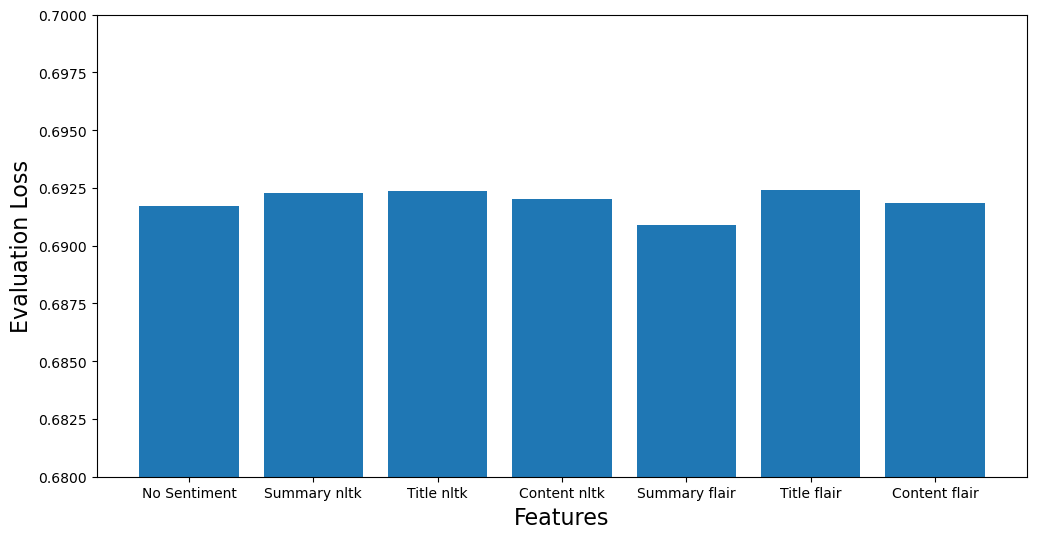

In [19]:
if not os.path.exists('./result'):
    os.mkdir('./result')

# Results from the Non_NLP part
non_nlp_result = np.array([0.6917309696183487])

plt.figure(figsize=(12, 6))
names = ['No Sentiment', 'Summary nltk', 'Title nltk', 'Content nltk', 'Summary flair', 'Title flair', 'Content flair']
plt.bar(names, np.append(non_nlp_result, cnn_ss_losses[:6]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_cnn_single.png')
plt.savefig('./result/nlp_cnn_single.eps')
plt.show()

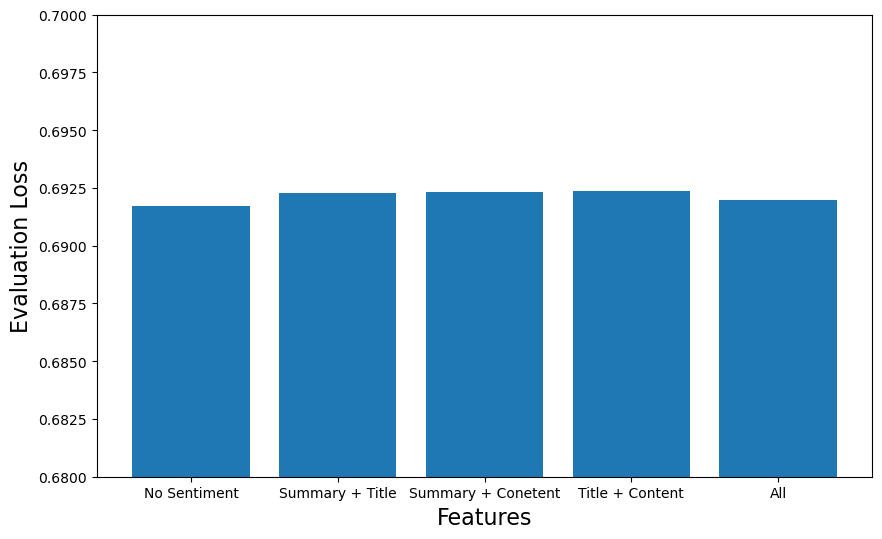

In [20]:
# Generate plots with two scores from nltk

plt.figure(figsize=(10, 6))
names = ['No Sentiment', 'Summary + Title', 'Summary + Conetent', 'Title + Content', 'All']
plt.bar(names, np.append(non_nlp_result, cnn_ss_losses[[6, 7, 8, -2]]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_cnn_nltk.png')
plt.savefig('./result/nlp_cnn_nltk.eps')
plt.show()

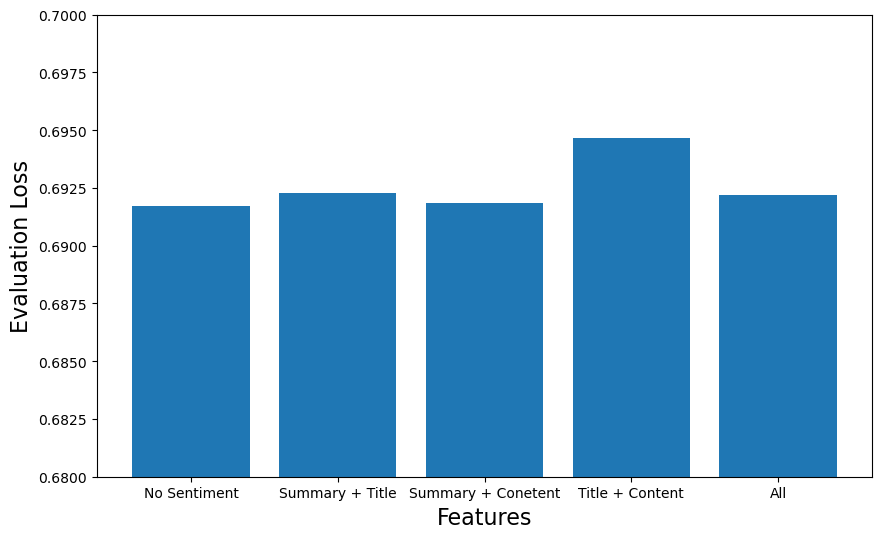

In [21]:
# Generate plots with two scores from flair

plt.figure(figsize=(10, 6))
names =['No Sentiment', 'Summary + Title', 'Summary + Conetent', 'Title + Content', 'All']
plt.bar(names, np.append(non_nlp_result, cnn_ss_losses[[9, 10, 11, -1]]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_cnn_flair.png')
plt.savefig('./result/nlp_cnn_flair.eps')
plt.show()

## GRU Model

In [18]:
class GRU_Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, num_layers, output_dim, if_bidirect = False):
        super(GRU_Model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_direct = 2 if if_bidirect else 1
        self.linear_layer_a = nn.Linear(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional = if_bidirect)
        self.linear_layer_b = nn.Linear(self.num_direct*hidden_dim, output_dim)
        self.output_layer = nn.Sigmoid()

        # Initialize
        self.linear_layer_a.weight.data.uniform_(-1e-3, 1e-3)
        self.linear_layer_b.weight.data.uniform_(-1e-3, 1e-3)
        
    
    def forward(self, inputs):
        inputs = self.linear_layer_a(inputs.T)
        x, _ = self.gru(inputs, None)
        if self.num_direct == 2:
            x = torch.cat((x[-1, :self.hidden_dim], x[0, self.hidden_dim:]), 0)
        else:
            x = x[-1, :] 
        x = self.linear_layer_b(x)
        return self.output_layer(x)

In [21]:
embedding_dim = 32
hidden_dim = 64
num_layers = 2
output_dim = 1

gru_train_subset_result = []
num_epoch = 2
loss_fn = nn.BCELoss()

seed = 12
np.random.seed(seed)
torch.manual_seed(seed)

for add_ft_id in tqdm(ft_ids, desc = "train_size"):
    gru_losses_eval = []
    feature_id = list(range(8)) + add_ft_id
    feature_num = len(feature_id)
    X_train_tmp = X_train[:, feature_id]
    
    for k in tqdm(range(10), desc = "k", leave = False):
        gru_model = GRU_Model(feature_num, embedding_dim, hidden_dim, num_layers, output_dim)
        optimizer = torch.optim.AdamW(gru_model.parameters(), lr=1e-3)
        gru_model.train()
        
        for i in range(num_epoch):
            for j in tqdm(np.random.permutation(np.arange(train_num)), desc = "Train", leave = False):
                outputs = gru_model.forward(X_train_tmp[j])
                loss = loss_fn(outputs, Y_train[j])
                loss.backward()
                optimizer.step()
                gru_model.zero_grad()
                
        gru_losses_eval.append(eval_model(X_test[:, feature_id], Y_test, gru_model, loss_fn))
        del gru_model
        gc.collect()
        
    gru_train_subset_result.append(gru_losses_eval)

train_size:   0%|          | 0/15 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

In [22]:
gru_ss_losses = np.zeros(len(cnn_train_subset_result))
for i in range(len(gru_train_subset_result)):
    mean_loss = 0
    for result in gru_train_subset_result[i]:
        mean_loss += result["losses"]
        
    print(mean_loss/10)
    gru_ss_losses[i] = mean_loss/10

0.6929672604098039
0.6923977329450495
0.6926541843835045
0.7046720662537743
0.693648271174992
0.6930784865337258
0.6926823654595542
0.6927426539799747
0.692901063841932
0.6927978869746713
0.6920103956671323
0.6923211469369775
0.6932795480770222
0.6923202255192925
0.6923133012126474


In [ ]:
# Results from the Non_NLP part
non_nlp_result = np.array([0.6918373807388194])

plt.figure(figsize=(10, 6))
names = ['No Sentiment', 'Summary nltk', 'Title nltk', 'Content nltk', 'Summary flair', 'Title flair', 'Content flair']
plt.bar(names, np.append(non_nlp_result, gru_ss_losses[:6]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_gru_single.png')
plt.savefig('./result/nlp_gru_single.eps')
plt.show()

In [ ]:
# Generate plots with two scores from nltk

plt.figure(figsize=(10, 6))
names = ['No Sentiment', 'Summary + Title', 'Summary + Conetent', 'Title + Content', 'All']
plt.bar(names, np.append(non_nlp_result, gru_ss_losses[[6, 7, 8, -2]]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_cnn_nltk.png')
plt.savefig('./result/nlp_cnn_nltk.eps')
plt.show()

In [ ]:
# Generate plots with two scores from flair

plt.figure(figsize=(10, 6))
names =['No Sentiment', 'Summary + Title', 'Summary + Conetent', 'Title + Content', 'All']
plt.bar(names, np.append(non_nlp_result, gru_ss_losses[[9, 10, 11, -1]]))
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Evaluation Loss", fontsize = 16)
plt.ylim([0.68, 0.70])
plt.savefig('./result/nlp_cnn_flair.png')
plt.savefig('./result/nlp_cnn_flair.eps')
plt.show()